In [1]:
import sys
import os

import pandas as pd
import numpy as np

import random

In [2]:
sys.path.insert(0, '..\\scripts')
# sys.path.insert(0, '../scripts')

In [3]:
import extract_annotations as E
import export as EXP

In [5]:
RAW_DATA = E.extract()

In [6]:
LABELS = RAW_DATA["labels"]
DATA = RAW_DATA['data']
print(len(DATA))
print(DATA[0])

188
['D:\\Personal\\sign_recognition\\notebooks\\..\\scripts\\../data\\001_png.rf.3d1d6e6d159f158bcb7ef6533f607641.jpg', [16], [[0.1453125, 0.35390625, 0.0390625, 0.0625, 'no_u_turn']]]


In [7]:
DATA[23][2]

[[0.44921875, 0.34296875, 0.0484375, 0.05625, 'bus_stop']]

In [8]:
BBOX_DATA = []
for D in DATA:
    for coord in D[2]:
        BBOX = np.concatenate((np.array(D[0]),np.array(coord, object)), axis=None)
        BBOX_DATA.append(BBOX)

In [9]:
BBOX_DATA = np.array(BBOX_DATA)

In [10]:
BBOX_DATA.shape

(277, 6)

In [11]:
BBOX_X = BBOX_DATA.T[0]
BBOX_Y = BBOX_DATA.T[1]

In [12]:
print(BBOX_X.shape, BBOX_Y.shape)

(277,) (277,)


In [13]:
BBOX_DATA

array([['D:\\Personal\\sign_recognition\\notebooks\\..\\scripts\\../data\\001_png.rf.3d1d6e6d159f158bcb7ef6533f607641.jpg',
        0.1453125, 0.35390625, 0.0390625, 0.0625, 'no_u_turn'],
       ['D:\\Personal\\sign_recognition\\notebooks\\..\\scripts\\../data\\002_png.rf.2de2b96871e0ca6582cb3cda753d1ccf.jpg',
        0.309375, 0.3359375, 0.13828125, 0.0796875, 'directional_normal'],
       ['D:\\Personal\\sign_recognition\\notebooks\\..\\scripts\\../data\\002_png.rf.2de2b96871e0ca6582cb3cda753d1ccf.jpg',
        0.5390625, 0.38046875, 0.03359375, 0.0421875,
        'pedestrian_crossing_ahead'],
       ...,
       ['D:\\Personal\\sign_recognition\\notebooks\\..\\scripts\\../data\\189_png.rf.b6f49b7e021679138acc748616e3acde.jpg',
        0.0109375, 0.365625, 0.021875, 0.04375, 'no_parking'],
       ['D:\\Personal\\sign_recognition\\notebooks\\..\\scripts\\../data\\189_png.rf.b6f49b7e021679138acc748616e3acde.jpg',
        0.271875, 0.334375, 0.02109375, 0.0296875, 'no_parking'],
       [

In [18]:
df = pd.DataFrame(BBOX_DATA, columns = ['path','norm_x_center','norm_y_center', 'norm_width', 'norm_height', 'label' ])

In [19]:
df["norm_area"] = df["norm_width"] * df["norm_height"]

In [20]:
df

,path,norm_x_center,norm_y_center,norm_width,norm_height,label,norm_area
0,D:\Personal\sign_recognition\notebooks\..\scri...,0.145313,0.353906,0.039062,0.0625,no_u_turn,0.002441
1,D:\Personal\sign_recognition\notebooks\..\scri...,0.309375,0.335938,0.138281,0.079687,directional_normal,0.011019
2,D:\Personal\sign_recognition\notebooks\..\scri...,0.539062,0.380469,0.033594,0.042188,pedestrian_crossing_ahead,0.001417
3,D:\Personal\sign_recognition\notebooks\..\scri...,0.304688,0.303125,0.219531,0.120313,directional_normal,0.026412
4,D:\Personal\sign_recognition\notebooks\..\scri...,0.360156,0.307812,0.050781,0.064844,pedestrian_crossing,0.003293
...,...,...,...,...,...,...,...
272,D:\Personal\sign_recognition\notebooks\..\scri...,0.492188,0.267969,0.060156,0.09375,expressway_entrance_end,0.00564
273,D:\Personal\sign_recognition\notebooks\..\scri...,0.358594,0.366406,0.102344,0.172656,expressway_entrance_end,0.01767
274,D:\Personal\sign_recognition\notebooks\..\scri...,0.010937,0.365625,0.021875,0.04375,no_parking,0.000957
275,D:\Personal\sign_recognition\notebooks\..\scri...,0.271875,0.334375,0.021094,0.029687,no_parking,0.000626


In [21]:
df.describe()

,path,norm_x_center,norm_y_center,norm_width,norm_height,label,norm_area
count,277,277.000000,277.000000,277.000000,277.000000,277,277.000000
unique,188,238.000000,213.000000,134.000000,125.000000,29,263.000000
top,D:\Personal\sign_recognition\notebooks\..\scri...,0.514062,0.392188,0.035937,0.065625,directional_express_way,0.006724
freq,5,4.000000,6.000000,8.000000,9.000000,35,2.000000


<Axes: ylabel='Density'>

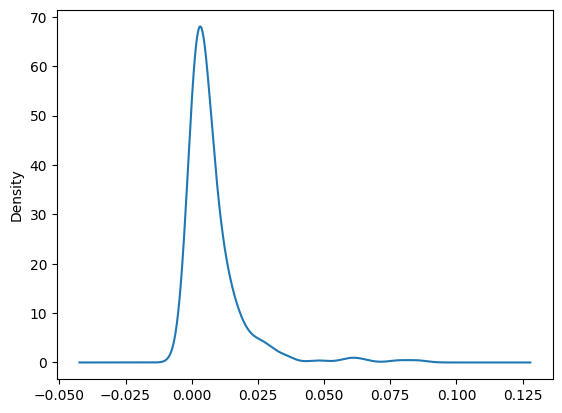

In [22]:
df['norm_area'].plot(kind='kde')

label
T_juc_ahead                   Axes(0.125,0.11;0.775x0.77)
bus_stop                      Axes(0.125,0.11;0.775x0.77)
chevron_markers               Axes(0.125,0.11;0.775x0.77)
directional_express_way       Axes(0.125,0.11;0.775x0.77)
directional_normal            Axes(0.125,0.11;0.775x0.77)
expressway_entrance_end       Axes(0.125,0.11;0.775x0.77)
expressway_entrance_start     Axes(0.125,0.11;0.775x0.77)
height_limit                  Axes(0.125,0.11;0.775x0.77)
left_merges_ahead             Axes(0.125,0.11;0.775x0.77)
level_crossing                Axes(0.125,0.11;0.775x0.77)
level_crossing_gates_ahead    Axes(0.125,0.11;0.775x0.77)
light_signal_ahead            Axes(0.125,0.11;0.775x0.77)
no_entry                      Axes(0.125,0.11;0.775x0.77)
no_left_turn                  Axes(0.125,0.11;0.775x0.77)
no_parking                    Axes(0.125,0.11;0.775x0.77)
no_right_turn                 Axes(0.125,0.11;0.775x0.77)
no_u_turn                     Axes(0.125,0.11;0.775x0.77)
other   

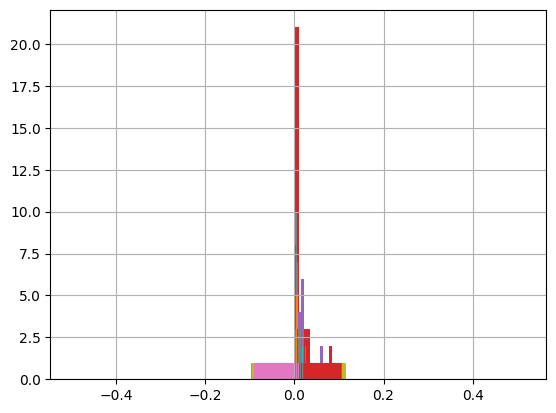

In [23]:
df.groupby('label').norm_area.hist()

In [24]:
df_sort_area = df.sort_values(by=["norm_area"])
df_sort_area.head()

,path,norm_x_center,norm_y_center,norm_width,norm_height,label,norm_area
106,D:\Personal\sign_recognition\notebooks\..\scri...,0.66875,0.494531,0.010156,0.017969,chevron_markers,0.000182
223,D:\Personal\sign_recognition\notebooks\..\scri...,0.132031,0.304688,0.010937,0.017969,chevron_markers,0.000197
227,D:\Personal\sign_recognition\notebooks\..\scri...,0.345313,0.325781,0.010937,0.01875,chevron_markers,0.000205
228,D:\Personal\sign_recognition\notebooks\..\scri...,0.288281,0.326562,0.0125,0.017188,chevron_markers,0.000215
105,D:\Personal\sign_recognition\notebooks\..\scri...,0.6,0.496875,0.010937,0.020313,chevron_markers,0.000222
